<a href="https://colab.research.google.com/github/anshdeepsinghrajput/Text-Summarization/blob/main/text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U huggingface_hub

In [ ]:
!huggingface-cli login

In [ ]:
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install py7zr
!pip install -U transformers

In [ ]:
!pip install -U datasets
from datasets import load_dataset

dataset = load_dataset("abisee/cnn_dailymail", "3.0.0")

In [2]:
dataset['train'][1]['article'][:300]

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many men'

In [3]:
dataset['train'][1]['highlights']

'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .'

In [4]:
# We will use model like GPT2, T5, BART, PEGASUS

In [5]:
from transformers import pipeline

pipe = pipeline('text-generation', model='gpt2-medium')

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
# Let's use text summarization

In [6]:
input_text = dataset['train'][1]['article'][:2000]
query = input_text + '\nTL;DR\n'
pipe_out = pipe(query, max_length=512, clean_up_tokenization_spaces=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [7]:
pipe_out[0]['generated_text']

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

In [8]:
pipe_out[0]['generated_text'][len(query):]

"You can find video and see more photography in Behind the Scenes\nIt is a jail and it has a prison, so we couldn't come all the way to Miami to be out of mind, the way you could have gone to Chicago or Chicago to take advantage of the Chicago World's Fair or Chicago Expo. But you could have watched people being executed, being starved in cold sweats (they"

In [9]:
summaries = {}
summaries['gpt2-medium-380M'] = pipe_out[0]['generated_text'][len(query):]

In [10]:
# Try T5 Transformers

In [11]:
pipe = pipeline('summarization', model='google-t5/t5-base')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [12]:
pipeout = pipe(input_text)

In [13]:
summaries['t5-base-223M'] = pipeout[0]['summary_text']

In [14]:
# Use bart model
# #
# pipe = pipeline("summarization", model="facebook/bart-large-cnn")
# pipe_out = pipe(input_text)

In [15]:
# summaries['bart-large-cnn-400M'] = pipe_out[0]['summary_text']

In [16]:
# PEGASUS
# pipe = pipeline('summarization', model='google/pegasus-cnn_dailymail')

In [17]:
# pipe_out = pipe(input_text)

In [18]:
# summaries['pegasus-cnn-568M'] = pipe_out[0]['summary_text']

In [19]:
for models in summaries:
    print(models.upper())
    print(summaries[models])
    print("")

GPT2-MEDIUM-380M
You can find video and see more photography in Behind the Scenes
It is a jail and it has a prison, so we couldn't come all the way to Miami to be out of mind, the way you could have gone to Chicago or Chicago to take advantage of the Chicago World's Fair or Chicago Expo. But you could have watched people being executed, being starved in cold sweats (they

T5-BASE-223M
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won't do what police say, judge says .



## **Fine Tuning Summarization model for custom dataset** on hugging face samsum dataset

In [20]:
# from datasets import load_dataset
# from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

In [21]:
device = 'gpu'
model_ckpt = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [ ]:
!pip install py7zr
samsum = load_dataset('samsum')

In [25]:
samsum['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [26]:
dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]

array([[<Axes: title={'center': 'dialogue_len'}>,
        <Axes: title={'center': 'summary_len'}>]], dtype=object)

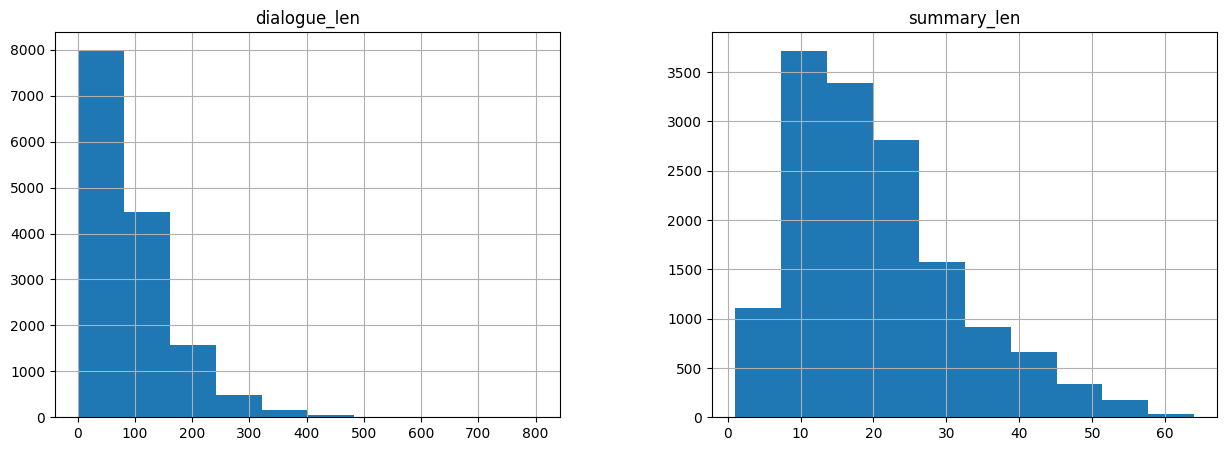

In [27]:
import pandas as pd

data = pd.DataFrame([dialogue_len, summary_len]).T
data.columns = ['dialogue_len', 'summary_len']

data.hist(figsize=(15,5))

In [28]:
# Data collator

def get_feature(batch):
    encodings = tokenizer(batch['dialogue'], text_target=batch['summary'], max_length = 1024, truncation = True)

    encodings = {'input_ids': encodings['input_ids'],
                 'attention_mask': encodings['attention_mask'],
                 'labels': encodings['labels']}
    return encodings

In [29]:
samsum_pt = samsum.map(get_feature, batched=True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [30]:
samsum_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [31]:
columns = ['input_ids', 'attention_mask', 'labels']
samsum_pt.set_format(type='torch', columns=columns)

In [32]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [33]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='bart_samsum',
    num_train_epochs=1,
    warmup_steps = 500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
)

trainer = Trainer(model = model, args = training_args, tokenizer = tokenizer, data_collator=data_collator, train_dataset=samsum_pt['train'], eval_dataset=samsum_pt['validation'])

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [34]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:656: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


TrainOutput(global_step=230, training_loss=1.4831277183864429, metrics={'train_runtime': 1829.928, 'train_samples_per_second': 8.051, 'train_steps_per_second': 0.126, 'total_flos': 8823027777404928.0, 'train_loss': 1.4831277183864429, 'epoch': 0.9991854466467553})

In [35]:
trainer.save_model('bart_samsum_model')  # Save model

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [36]:
# Custom dialogue prediction

pipe = pipeline('summarization', model='bart_samsum_model')
gen_kwargs = {'length_penalty':0.8, 'num_beams':8, 'max_length':128}

custom_dialogue = """
Laxmi Kant: what work you planning to give Tom?
Julie: I was hoping to send him a business trip first.
Laxmi Kant: Cool! Is there any suitable work for him?
Julie: He did excellent in last quarter. I will assign new project, once he is back
"""
print(pipe(custom_dialogue, **gen_kwargs))

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 128, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)


[{'summary_text': '. Julie wants to send Tom a business trip first. Julie will assign Tom a new project once he is back from the business trip. Julie. Tom did excellent in last quarter. Julie is sending Tom a project to Tom.    Laxmi Kant.'}]


In [37]:
!zip bart_samsum.zip -r bart_samsum_model/

  adding: bart_samsum_model/ (stored 0%)
  adding: bart_samsum_model/special_tokens_map.json (deflated 52%)
  adding: bart_samsum_model/config.json (deflated 61%)
  adding: bart_samsum_model/model.safetensors (deflated 7%)
  adding: bart_samsum_model/merges.txt (deflated 53%)
  adding: bart_samsum_model/tokenizer.json (deflated 72%)
  adding: bart_samsum_model/training_args.bin (deflated 51%)
  adding: bart_samsum_model/vocab.json (deflated 59%)
  adding: bart_samsum_model/tokenizer_config.json (deflated 75%)
  adding: bart_samsum_model/generation_config.json (deflated 48%)
